<a href="https://colab.research.google.com/github/snehatembhare20/DR_Stages_Classification/blob/main/Face_Recognition_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install deepface

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 87.2/87.2 kB 9.4 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.6/108.6 kB 11.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 85.0/85.0 kB 9.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.9/1.9 MB 37.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 63.8 MB/s eta 0:00:00
  Created wheel for fire: filename=fire-0.7.0-py3-none-any.whl size=114249 sha256=d935704313da11eb4187d9778c3df71b5c1aebec4e584c4cc5466793bbf8f688
  Stored in directory: /root/.cache/pip/wheels/46/54/24/1624fd5b8674eb1188623f7e8e17cdf7c0f6c24b609dfb8a89
Successfully built fire


In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
import cv2
import matplotlib.pyplot as plt
from deepface import DeepFace

25-02-26 11:58:55 - Directory /root/.deepface has been created
25-02-26 11:58:55 - Directory /root/.deepface/weights has been created


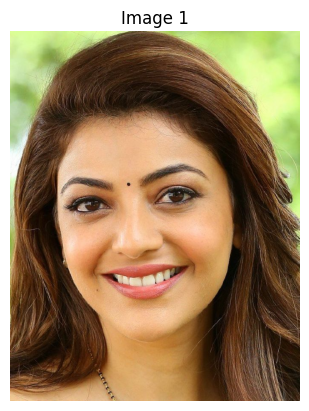

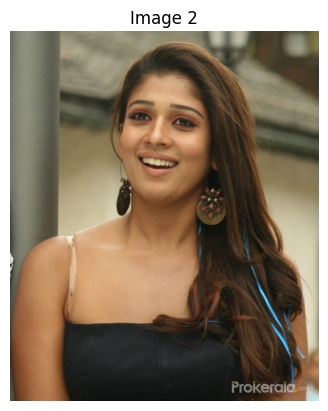

In [9]:
image1_path = "/content/drive/MyDrive/kajal.jpg"
image2_path = "/content/drive/MyDrive/nay1.jpg"

def show_image(image_path, title="Image"):
    img = cv2.imread(image_path)  # Read the image
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for correct color display
    plt.imshow(img)
    plt.title(title)
    plt.axis("off")  # Hide axes
    plt.show()

# Display both images
show_image(image1_path, "Image 1")
show_image(image2_path, "Image 2")

In [10]:
database_path = "/content/drive/MyDrive/images"

# Perform face recognition
result = DeepFace.find(img_path=image2_path, db_path=database_path)

print("Recognition Result:")
print(result)

25-02-26 12:01:07 - Found 0 newly added image(s), 0 removed image(s), 3 replaced image(s).


Finding representations: 100%|██████████| 3/3 [00:00<00:00,  6.77it/s]


25-02-26 12:01:07 - There are now 3 representations in ds_model_vggface_detector_opencv_aligned_normalization_base_expand_0.pkl
25-02-26 12:01:07 - Searching /content/drive/MyDrive/nay1.jpg in 3 length datastore
25-02-26 12:01:08 - find function duration 1.1146373748779297 seconds
Recognition Result:
[                                identity  \
0  /content/drive/MyDrive/images/nay.jpg   

                                       hash  target_x  target_y  target_w  \
0  681220bf7408bfb9e058fdf53e6ac14194983294        97        71       178   

   target_h  source_x  source_y  source_w  source_h  threshold  distance  
0       178       203        95       247       247       0.68  0.307841  ]


In [11]:
# Compare two images to see if they belong to the same person
verification_result = DeepFace.verify(image1_path, image2_path)

print("Verification Result:")
print(verification_result)

Verification Result:
{'verified': False, 'distance': 0.7204803981295507, 'threshold': 0.68, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine', 'facial_areas': {'img1': {'x': 34, 'y': 186, 'w': 535, 'h': 535, 'left_eye': (375, 387), 'right_eye': (190, 408)}, 'img2': {'x': 203, 'y': 95, 'w': 247, 'h': 247, 'left_eye': (367, 197), 'right_eye': (281, 185)}}, 'time': 1.41}


In [12]:
# Perform face analysis on one image
analysis_result = DeepFace.analyze(img_path=image1_path, actions=["age", "gender", "emotion", "race"])

print("Face Analysis Result:")
print(analysis_result)

Action: race: 100%|██████████| 4/4 [00:00<00:00, 47.34it/s]

Face Analysis Result:
[{'age': 30, 'region': {'x': 34, 'y': 186, 'w': 535, 'h': 535, 'left_eye': (375, 387), 'right_eye': (190, 408)}, 'face_confidence': 0.91, 'gender': {'Woman': 99.99998807907104, 'Man': 1.452246749522601e-05}, 'dominant_gender': 'Woman', 'emotion': {'angry': 3.679137568108052e-15, 'disgust': 8.547023713032244e-27, 'fear': 3.786348168127593e-17, 'happy': 99.98801946640015, 'sad': 3.7151191174258306e-13, 'surprise': 5.308747538790293e-09, 'neutral': 0.011982426076428965}, 'dominant_emotion': 'happy', 'race': {'asian': 2.2728411480784416, 'indian': 16.49956703186035, 'black': 1.1235245503485203, 'white': 16.857632994651794, 'middle eastern': 29.19526994228363, 'latino hispanic': 34.051164984703064}, 'dominant_race': 'latino hispanic'}]
